# General Task Performance 

In [1]:
#%%
%load_ext autoreload
%autoreload 2

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import logging

from mono_multi.setup import (
    PAPER_TASKS,
    BASELINES,
    FIGURES_ROOT_DIR,
)

from mono_multi.utils import (
    load_model_outputs_same_prompt,
    load_results_overview,
    add_evals_to_df,
    load_data_if_needed,
    get_top_models_by_eps,
    df_to_dict,
)
from mono_multi.baseline.utils import load_baselines

from mono_multi.plotting import (
    plot_accuracies,
    plot_general_performance_task,
    sort_legend_items
)

/Users/mgorecki/opt/miniconda3/envs/monoc-py311/lib/python3.11/site-packages/xport/__about__.py:18: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import DistributionNotFound, get_distribution


In [ ]:
plot_config_file = "./results/.matplotlibrc"
plt.rcParams.update(mpl.rc_params_from_file(fname=plot_config_file))

FIGURES_PAPER_DIR = FIGURES_ROOT_DIR / "same-prompt"
TASKS = PAPER_TASKS
print("tasks", TASKS)

tasks ('ACSIncome', 'ACSEmployment', 'BRFSS_Blood_Pressure', 'SIPP', 'ACSTravelTime', 'ACSPublicCoverage', 'ACSMobility')


In [4]:
select_by='accuracy' #'balanced_accuracy' #
fit_threshold_for= 'balanced_accuracy' #'accuracy' #

## Load Task Data

In [5]:
try:
    data_all
except NameError:
    print("'data_all' not yet defined")
    data_all = load_data_if_needed(data=None, tasks=TASKS)
else:
    print("Already defined, update if needed.")
    data_all = load_data_if_needed(data=data_all, tasks=TASKS)

'data_all' not yet defined
ACSIncome
ACSEmployment


BRFSS_Blood_Pressure
SIPP
ACSTravelTime
ACSPublicCoverage
ACSMobility


## Load Baselines

In [6]:
baseline_scores, baseline_evals = load_baselines(baselines=BASELINES, tasks=TASKS)

baseline_predictions = {
    task: baseline_scores[task].map(lambda x: int(x >= 0.5)) for task in TASKS
}
baseline_predictions["ACSIncome"].head()

Loading baselines for ACSIncome.
- Constant: Load predictions from 'results/baselines/model-Constant/Constant_task-ACSIncome/Constant_bench-211220205'.
- LogisticRegression: Load predictions from 'results/baselines/model-LogisticRegression/LogisticRegression_task-ACSIncome/LogisticRegression_bench-790429520'.
- GBM: Load predictions from 'results/baselines/model-GBM/GBM_task-ACSIncome/GBM_bench-996001762'.
- XGBoost: Load predictions from 'results/baselines/model-XGBoost/XGBoost_task-ACSIncome/XGBoost_bench-3794332052'.
- NN: Load predictions from 'results/baselines/model-NN/NN_task-ACSIncome/NN_bench-276142988'.
Loading baselines for ACSEmployment.
- Constant: Load predictions from 'results/baselines/model-Constant/Constant_task-ACSEmployment/Constant_bench-1469218015'.
- LogisticRegression: Load predictions from 'results/baselines/model-LogisticRegression/LogisticRegression_task-ACSEmployment/LogisticRegression_bench-2439278790'.
- GBM: Load predictions from 'results/baselines/model-

,Constant,LogisticRegression,GBM,XGBoost,NN
238351,0,0,0,0,0
2995677,0,0,0,0,0
2360043,0,0,1,1,1
1924596,0,0,0,0,0
2803585,0,0,0,0,0


In [7]:
print(f"{'baseline':20} & " + " & ".join(TASKS) + "\\\\")
for baseline in BASELINES:
    row = f"{baseline:20} & "
    for task in TASKS:
        row += f"\t{baseline_evals[task][baseline]['balanced_accuracy']:.4f} & "
    print(row[:-2] + "\\\\")

baseline             & ACSIncome & ACSEmployment & BRFSS_Blood_Pressure & SIPP & ACSTravelTime & ACSPublicCoverage & ACSMobility\\
Constant             & 	0.5000 & 	0.5000 & 	0.5000 & 	0.5000 & 	0.5000 & 	0.5000 & 	0.5000 \\
LogisticRegression   & 	0.7116 & 	0.7857 & 	0.6423 & 	0.6340 & 	0.5235 & 	0.5859 & 	0.5164 \\
GBM                  & 	0.7952 & 	0.8329 & 	0.6607 & 	0.8184 & 	0.6663 & 	0.7114 & 	0.5980 \\
XGBoost              & 	0.7995 & 	0.8336 & 	0.6612 & 	0.8168 & 	0.6859 & 	0.7193 & 	0.6055 \\
NN                   & 	0.7740 & 	0.8299 & 	0.6519 & 	0.6830 & 	0.6076 & 	0.6809 & 	0.5516 \\


## Load Predictions

In [8]:
threshold_fitted = True

df_0 = load_results_overview(
    num_shots=0, threshold_fitted=threshold_fitted, same_prompt=True
)
df_0 = df_0[df_0["task"].isin(TASKS)]
df_0 = df_0[df_0["correct_order_bias"]==0]
if threshold_fitted and ("threshold_obj" in df_0.columns):
    df_0 = df_0[df_0["threshold_obj"]==fit_threshold_for]
df_0['predictions_path'] = '/Volumes/mgorecki/monoculture/' + df_0['predictions_path']
df_0 = add_evals_to_df(
    df_0, metrics=["fpr", "fnr", "n_samples", "num_pred_negatives"]
)

df_10 = load_results_overview(
    num_shots=10, threshold_fitted=threshold_fitted, same_prompt=True
)
df_10 = df_10[df_10["task"].isin(TASKS)]
df_10 = df_10[df_10["correct_order_bias"]==0]
if threshold_fitted and ("threshold_obj" in df_10.columns):
    df_10 = df_10[df_10["threshold_obj"]==fit_threshold_for]
df_10['predictions_path'] = '/Volumes/mgorecki/monoculture/' + df_10['predictions_path']
df_10 = add_evals_to_df(
    df_10,
    metrics=["fpr", "fnr", "n_samples", "num_pred_negatives"],
)

In [9]:
try:
    assert set(TASKS).issubset(
        set(df_0["task"].unique())
    ), f"Results for all tasks to be analysed have to be available, available are: {list(df_0['task'].unique())} "
except AssertionError:
    TASKS = list(df_0["task"].unique())
    logging.warning(f"Reduced TASKS to available tasks: {TASKS}")

In [10]:
predictions_all_0 = load_model_outputs_same_prompt(
    df_0, tasks=TASKS, return_risk_scores=False
)
predictions_all_10 = load_model_outputs_same_prompt(
    df_10, tasks=TASKS, return_risk_scores=False
)

ACSIncome
ACSEmployment
BRFSS_Blood_Pressure
SIPP
ACSTravelTime
ACSPublicCoverage
ACSMobility
ACSIncome
ACSEmployment
BRFSS_Blood_Pressure
SIPP
ACSTravelTime
ACSPublicCoverage
ACSMobility


## 0-shot vs 10-shot

ACSIncome
0-shot mean accuracy: 0.713515
10-shot mean accuracy: 0.664561
ACSEmployment
0-shot mean accuracy: 0.672796
10-shot mean accuracy: 0.664561
BRFSS_Blood_Pressure
0-shot mean accuracy: 0.56634
10-shot mean accuracy: 0.664561
SIPP
0-shot mean accuracy: 0.646869
10-shot mean accuracy: 0.664561
ACSTravelTime
0-shot mean accuracy: 0.54744
10-shot mean accuracy: 0.664561
ACSPublicCoverage
0-shot mean accuracy: 0.62949
10-shot mean accuracy: 0.664561
ACSMobility
0-shot mean accuracy: 0.568291
10-shot mean accuracy: 0.664561
performance-accuracy-0-vs-10_tresh_fitted-balanced-accuracy


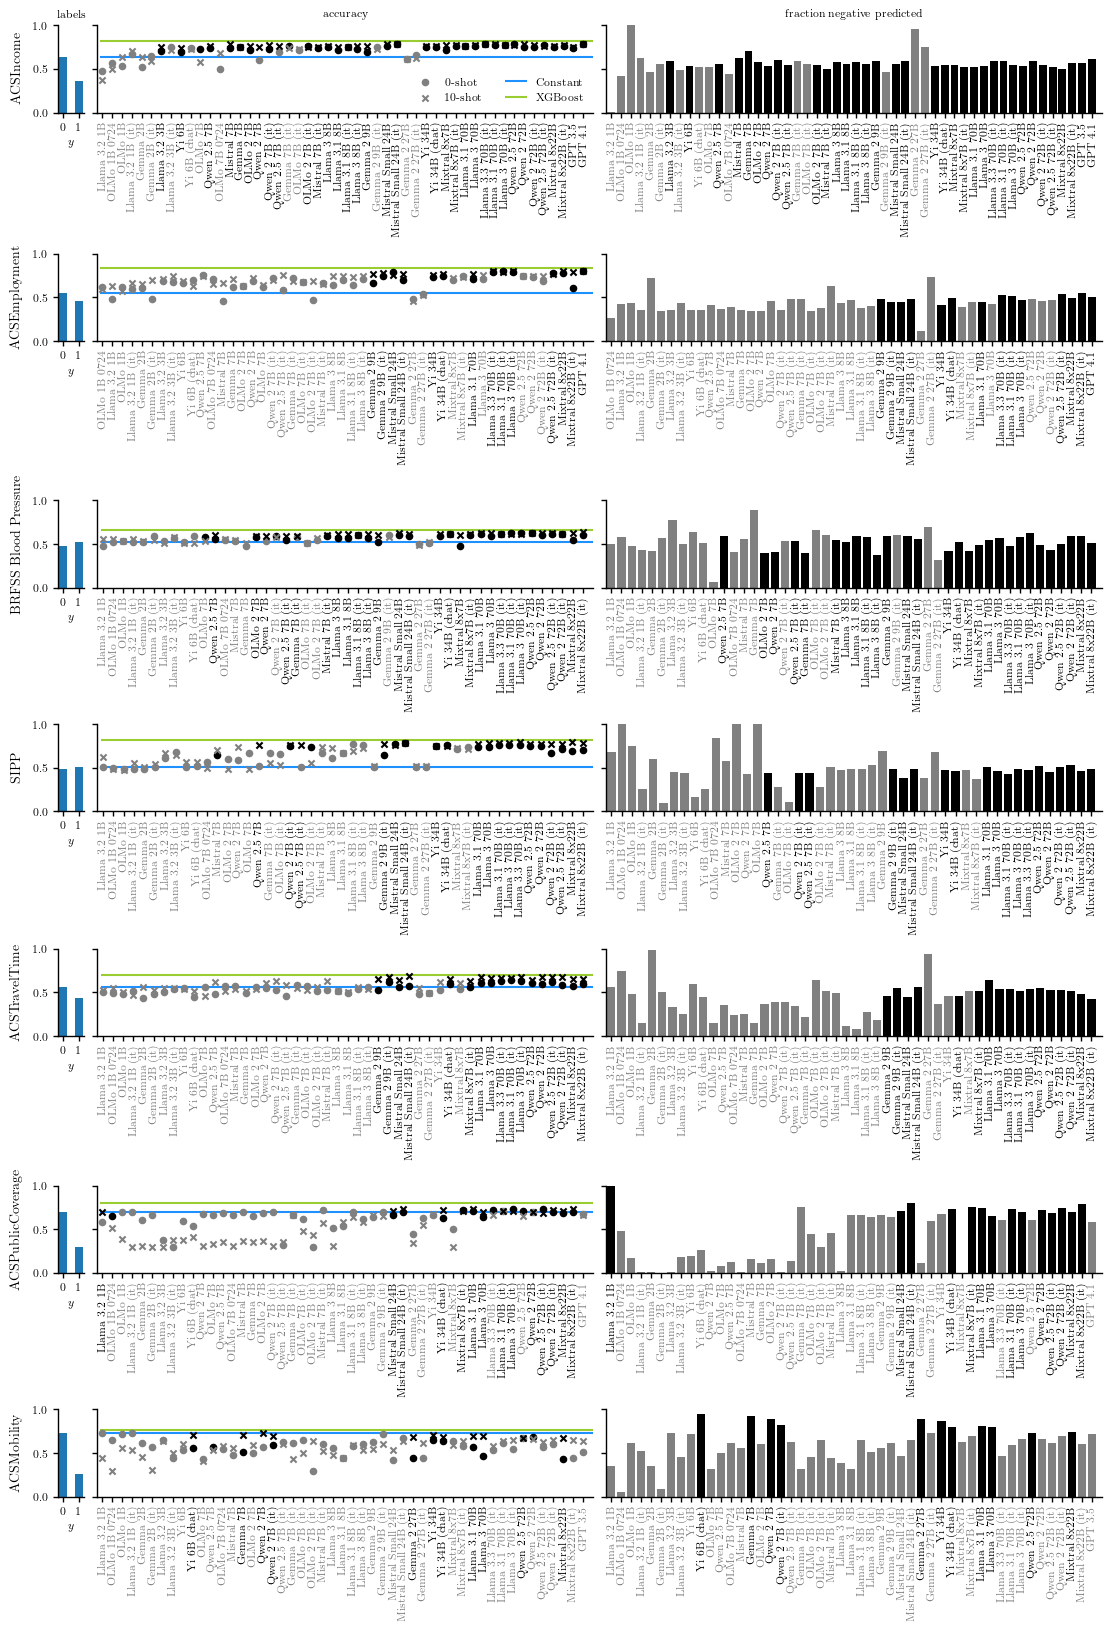

In [11]:
tasks_to_plot = PAPER_TASKS
eps = 0.05

fig_width = 2* plt.rcParams['figure.figsize'][0]
fig_height = 5.4*plt.rcParams['figure.figsize'][1]

fig, axs = plt.subplots(
        nrows=len(tasks_to_plot),
        ncols=3,
        figsize=(fig_width, fig_height),
        constrained_layout=True,
        gridspec_kw={"width_ratios": [0.5, 9.5, 9.5]},
        # gridspec_kw={"width_ratios": [1, 9]},
        sharey="row",
    )

# label_rotation = 45
ha = 'right'

for i, task in enumerate(tasks_to_plot):
    print(task)

    if len(axs[i]) == 3:
        ax_label, ax_accuracy, ax_frac_neg = axs[i]
    else:
        ax_label, ax_accuracy = axs[i]
    models_in_common = set(predictions_all_0[task].columns).intersection(set(predictions_all_10[task].columns))
    mask_0 = (df_0["task"] == task) & (
        df_0["model"].isin(models_in_common)
    )
    mask_10 = (df_10["task"] == task) & (
        df_10["model"].isin(models_in_common)
    )

    # task as row label on the left
    ax_label.annotate(
        task.replace("_", " "),
        xy=(0, 0.5),
        xytext=(-ax_label.yaxis.labelpad, 0),
        xycoords=ax_label.yaxis.label,
        textcoords="offset points",
        size="medium",
        ha="right",
        va="center",
        rotation=90,
    )

    y_true = data_all[task][1]
    num_models = df_0[mask_0].shape[0]
    
    # 0-shot
    models_to_highlight_10 = get_top_models_by_eps(df_10[mask_10], eps=eps, acc=select_by)
    acc_dict_0 = df_to_dict(df_0[mask_0][["model", select_by]])
    plot_accuracies(
        ax_accuracy,
        evals=acc_dict_0,
        baseline_accs=None,
        models_above_baseline=models_to_highlight_10,
        hline_xmin=-0.2,
        hline_xmax=num_models + 0.1,
        marker="o",
        scatter_label="0-shot",
    )
    print(f'0-shot mean {select_by}: {np.array(list(acc_dict_0.values())).mean():g}')
    # 10-shot
    plot_general_performance_task(
        axs[i],
        df=df_10[mask_10],
        baseline_evals=baseline_evals[task],
        ytrue=y_true,
        models_to_highlight=models_to_highlight_10,
        marker="x",
        scatter_label="10-shot",
        acc=select_by,
        label_rotation = 90,
        # ha = ha
    )
    acc_dict_10 = df_to_dict(df_10[["model", select_by]])
    print(f'10-shot mean {select_by}: {np.array(list(acc_dict_10.values())).mean():g}')

handles, labels = axs[0, 1].get_legend_handles_labels()
labels, handles = sort_legend_items(dict(zip(labels, handles)), order=sorted(labels))
axs[0, 1].legend(loc="lower right", labels=labels, handles=handles, ncol=2)
# set column titles
titles = ["labels", select_by.replace('_', ' '), 'fraction negative predicted']
for c in range(len(axs[i])):
    axs[0,c].set_title(titles[c])

file_name = f"performance-{select_by.replace('_', '-')}-0-vs-10" + (f"_tresh_fitted-{fit_threshold_for.replace('_','-')}" if threshold_fitted == 1 else "") #+ '_b'
print(file_name)
for ending in [".svg", ".pdf"]:
    plt.savefig(FIGURES_PAPER_DIR / (file_name + ending))

plt.show()

ACSIncome
10-shot mean accuracy: 0.728677
0-shot mean accuracy: 0.645867
ACSEmployment
10-shot mean accuracy: 0.711999
0-shot mean accuracy: 0.645867
BRFSS_Blood_Pressure
10-shot mean accuracy: 0.582977
0-shot mean accuracy: 0.645867
SIPP
10-shot mean accuracy: 0.668413
0-shot mean accuracy: 0.645867
ACSTravelTime
10-shot mean accuracy: 0.5884
0-shot mean accuracy: 0.645867
ACSPublicCoverage
10-shot mean accuracy: 0.525593
0-shot mean accuracy: 0.645867
ACSMobility
10-shot mean accuracy: 0.585325
0-shot mean accuracy: 0.645867
performance-accuracy-0-vs-10_tresh_fitted-balanced-accuracy


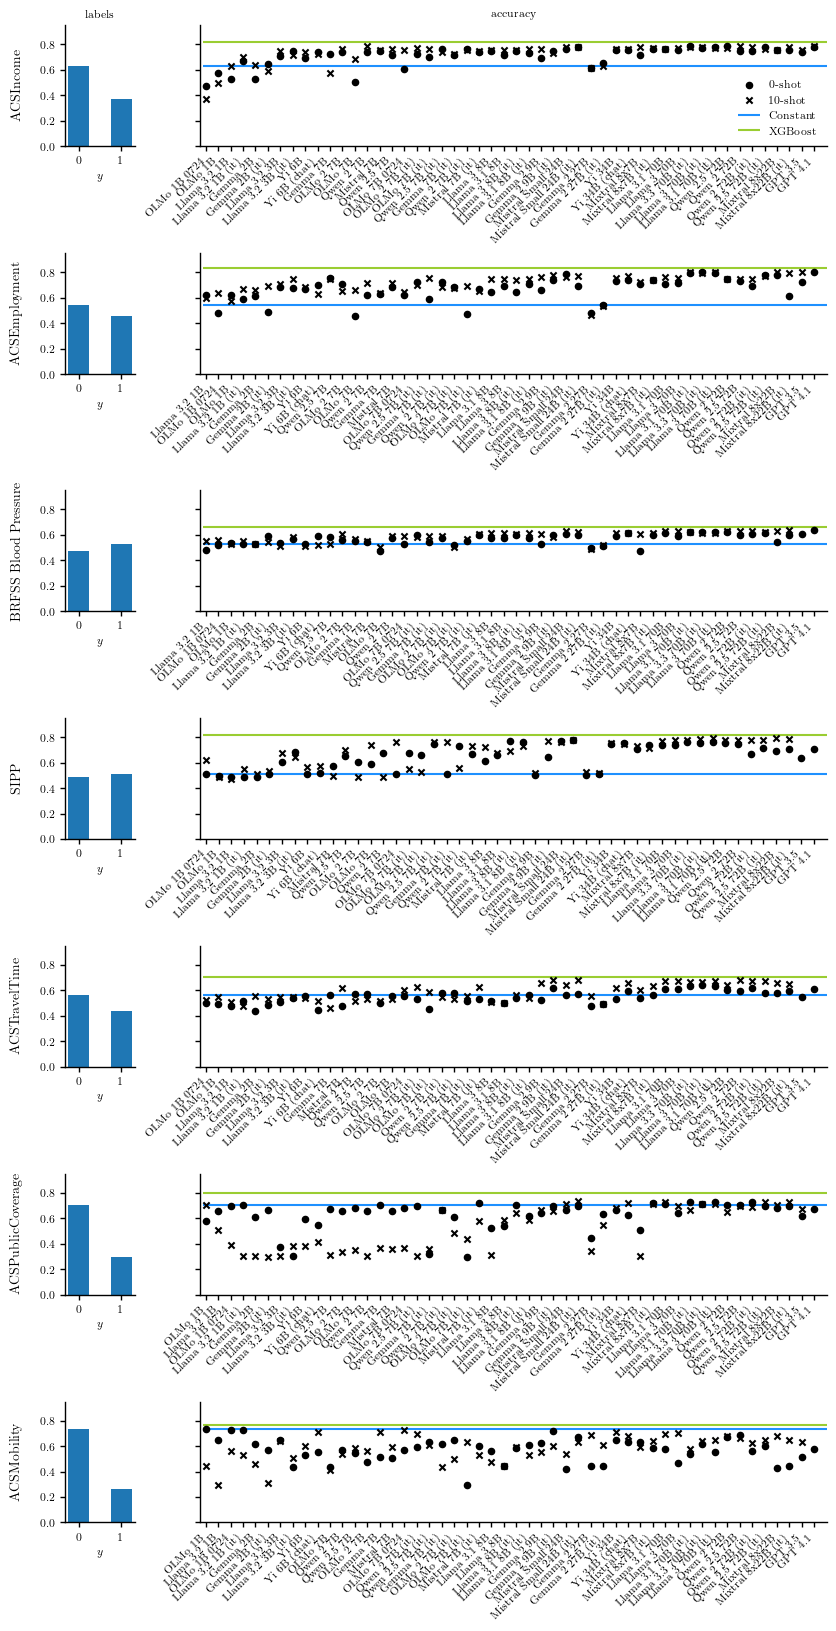

In [12]:
tasks_to_plot = PAPER_TASKS
eps = 0.05

fig_width = 1.5* plt.rcParams['figure.figsize'][0]
fig_height = 5.4*plt.rcParams['figure.figsize'][1]

fig, axs = plt.subplots(
        nrows=len(tasks_to_plot),
        ncols=2,
        figsize=(fig_width, fig_height),
        constrained_layout=True,
        gridspec_kw={"width_ratios": [1, 9]},
        sharey="row",
    )

# label_rotation = 45
ha = 'right'

for i, task in enumerate(tasks_to_plot):
    print(task)

    if len(axs[i]) == 3:
        ax_label, ax_accuracy, ax_frac_neg = axs[i]
    else:
        ax_label, ax_accuracy = axs[i]
    mask_0 = (df_0["task"] == task) & (
        df_0["model"].isin(predictions_all_0[task].columns)
    )
    mask_10 = (df_10["task"] == task) & (
        df_10["model"].isin(predictions_all_10[task].columns)
    )

    # task as row label on the left
    ax_label.annotate(
        task.replace("_", " "),
        xy=(0, 0.5),
        xytext=(-ax_label.yaxis.labelpad - 5, 0),
        xycoords=ax_label.yaxis.label,
        textcoords="offset points",
        size="medium",
        ha="right",
        va="center",
        rotation=90,
    )

    y_true = data_all[task][1]
    num_models = df_0[mask_0].shape[0]
    
    # 10-shot
    models_to_highlight_10 = predictions_all_10[task].columns.to_list()
    acc_dict = df_to_dict(df_10[mask_10][["model", select_by]])
    plot_accuracies(
        ax_accuracy,
        evals=acc_dict,
        baseline_accs=None,
        models_above_baseline=models_to_highlight_10,
        hline_xmin=-0.2,
        hline_xmax=num_models + 0.1,
        marker="x",
        scatter_label="10-shot",
    )
    print(f'10-shot mean {select_by}: {np.array(list(acc_dict.values())).mean():g}')
    # 0-shot
    models_to_highlight_0 = predictions_all_0[task].columns.to_list()
    plot_general_performance_task(
        axs[i],
        df=df_0[mask_0],
        baseline_evals=baseline_evals[task],
        ytrue=y_true,
        models_to_highlight=models_to_highlight_0,
        marker="o",
        scatter_label="0-shot",
        acc=select_by,
        label_rotation = 45,
        ha = ha
    )
    acc_dict_0 = df_to_dict(df_0[["model", select_by]])
    print(f'0-shot mean {select_by}: {np.array(list(acc_dict_0.values())).mean():g}')

handles, labels = axs[0, 1].get_legend_handles_labels()
labels, handles = sort_legend_items(dict(zip(labels, handles)), order=sorted(labels))
axs[0, 1].legend(loc="lower right", labels=labels, handles=handles)
# set column titles
titles = ["labels", select_by.replace('_', ' '), 'fraction negative predicted']
for c in range(len(axs[i])):
    axs[0,c].set_title(titles[c])

file_name = f"performance-{select_by.replace('_', '-')}-0-vs-10" + (f"_tresh_fitted-{fit_threshold_for.replace('_','-')}" if threshold_fitted == 1 else "") #+ '_b'
print(file_name)
# for ending in [".svg", ".pdf"]:
#     plt.savefig(FIGURES_PAPER_DIR / (file_name + ending))

plt.show()